In [2]:
import numpy as np
import numpy
import pandas as pd
from PIL import Image
import pathlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import *
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [3]:
train_data_dir = "C:/Users/user/Desktop/preprocessed_data"

image_size = (224, 224)
batch_size = 128

train = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset ="training",
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=True,
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset ="validation",
    batch_size=batch_size,
    label_mode="categorical",
    image_size=image_size
)

Found 22169 files belonging to 41 classes.
Using 17736 files for training.
Found 22169 files belonging to 41 classes.
Using 4433 files for validation.


In [4]:
import tensorflow as tf

def augment(image, label):
  image = tf.image.random_flip_left_right(image)
  return image, label

train = train.map(augment)

In [5]:
import tensorflow_hub as hub
output_shape = 41
input_size = (224, 224, 3)
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

model = Sequential([
    InputLayer(input_shape=input_size),
    hub.KerasLayer(model_url),
    Dense(units=output_shape, activation='softmax')
])

lr = 1e-3

model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=CategoricalCrossentropy(),
        metrics=["accuracy"]
)

model.build((batch_size, ) + input_size)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 41)                41082     
                                                                 
Total params: 3581347 (13.66 MB)
Trainable params: 41082 (160.48 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [7]:
trained_model = model.fit(
    (train),
    validation_data=(validation_dataset),
    epochs = 10)

Epoch 1/10



139/139 [==============================] - 118s 827ms/step - loss: 2.0260 - accuracy: 0.4570 - val_loss: 1.6739 - val_accuracy: 0.5294
Epoch 2/10
139/139 [==============================] - 109s 787ms/step - loss: 1.5346 - accuracy: 0.5679 - val_loss: 1.5427 - val_accuracy: 0.5610
Epoch 3/10
139/139 [==============================] - 109s 780ms/step - loss: 1.4201 - accuracy: 0.5896 - val_loss: 1.4882 - val_accuracy: 0.5750
Epoch 4/10
139/139 [==============================] - 110s 788ms/step - loss: 1.3680 - accuracy: 0.6002 - val_loss: 1.4724 - val_accuracy: 0.5707
Epoch 5/10
139/139 [==============================] - 114s 814ms/step - loss: 1.3164 - accuracy: 0.6116 - val_loss: 1.4593 - val_accuracy: 0.5761
Epoch 6/10
139/139 [==============================] - 108s 777ms/step - loss: 1.2922 - accuracy: 0.6173 - val_loss: 1.4035 - val_accuracy: 0.5881
Epoch 7/10
139/139 [==============================] - 108s 773ms/step - loss: 1.2676 - accuracy: 0.6228 - val_loss: 1.4040 - val_accura

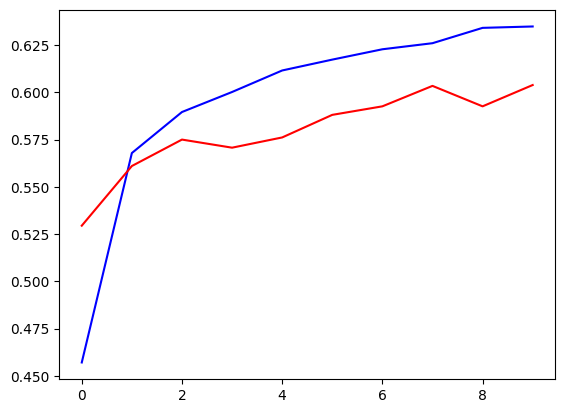

In [9]:
plt.plot(range(10), trained_model.history['accuracy' ], 'blue')
plt.plot(range(10), trained_model.history['val_accuracy'], 'red')